# Boston Housing

# About the dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [9]:
# Importing all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Reading the CSV File
df = pd.read_csv('BostonHousing.csv')

In [11]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# EDA

## Insight 1

Text(4.944444444444445, 0.5, 'Count of Neighbourhood')

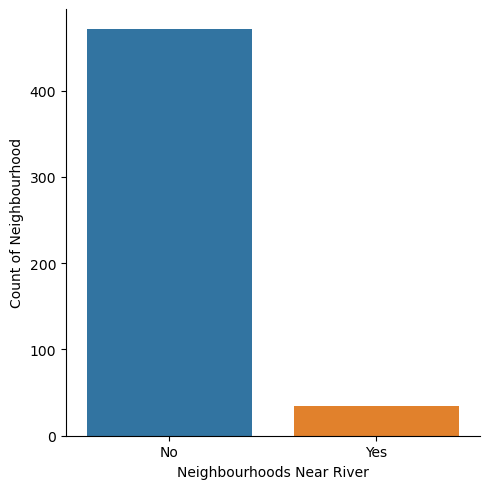

In [15]:
df['chas'] = df['chas'].replace({0: 'No', 1: 'Yes'})
sns.catplot(data=df, x="chas", kind="count")
plt.xlabel("Neighbourhoods Near River")
plt.ylabel("Count of Neighbourhood")

### Most of the Boston's neighbourhood tract does not bounds the river. As the numbers are low, we can expect a huge market prices for the neighbourhood near river as supply is too low. According to the law of supply, lesser the supply of a particular neighbourhood the more the price is. However, is it neccessarily true with our dataset on accordance to supply principle? Let us see them in upcoming insights.... 

## Insight 2

[Text(0.5, 0, "Median value of owner-occupied homes in $1000's"),
 Text(0, 0.5, 'Count of Neighbourhood')]

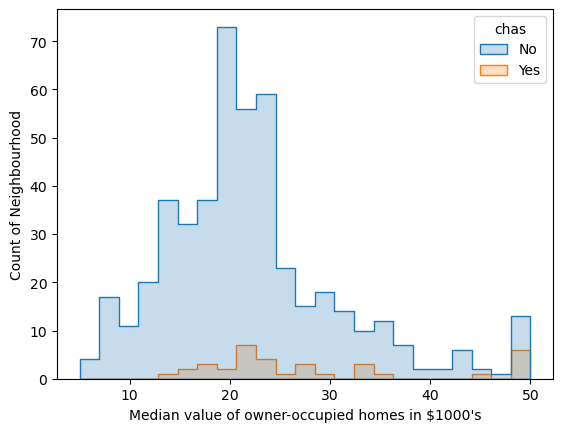

In [16]:
sns.histplot(df, x="medv",hue="chas",element="step").set(xlabel="Median value of owner-occupied homes in $1000's",ylabel="Count of Neighbourhood")

### As it was mentioned in the previous insight, the supply principle acts properly in the Boston housing. More number of neighbourhoods near Charles river has price of houses more than 50000 dollars. The higher price is due to fewer number of neighbourhood around the river. 

In [17]:
df['chas'] = df['chas'].replace({"No": 0, "Yes": 1})

## Insight 3(Are there anyother infrastructure or natural resources affecting the price of the houses in neighbourhood?)

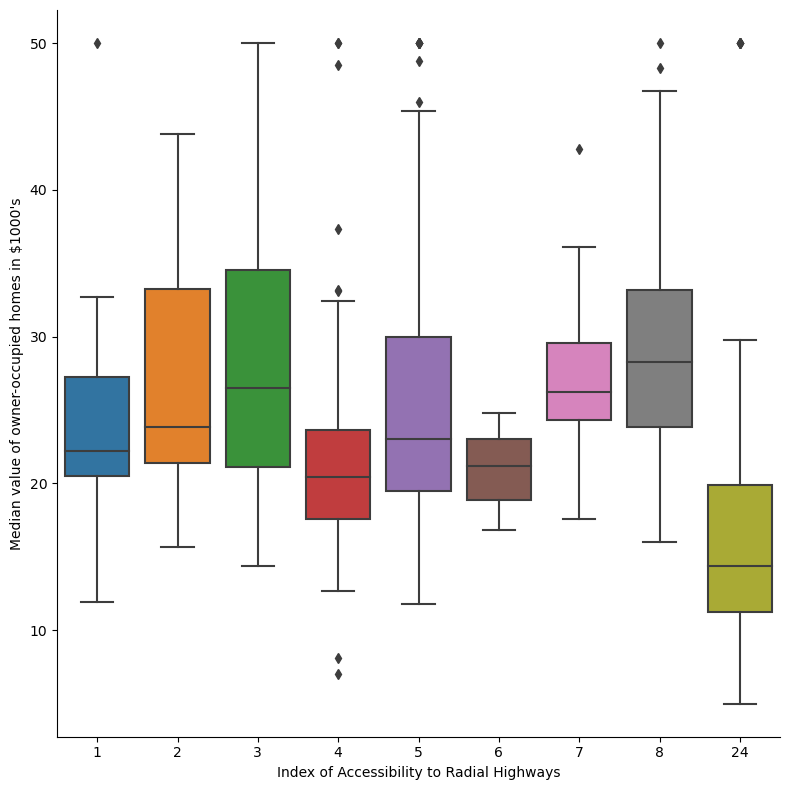

In [18]:
sns.catplot(data=df, x="rad", y="medv", kind="box",height=8).set(xlabel="Index of Accessibility to Radial Highways",ylabel="Median value of owner-occupied homes in $1000's")
plt.show()

### Usually, in a value of neighbourhood increases when it has access to roads. However, in this analysis it is surprisingly visible that neighbourhood with higher accessibility to highways has lower value compared to the one's with less accessible. By this we can find that people prefer more secluded way of living in Boston. Is this hypothesis really true? Let us dig the data more inside!!!!

## Insight 4

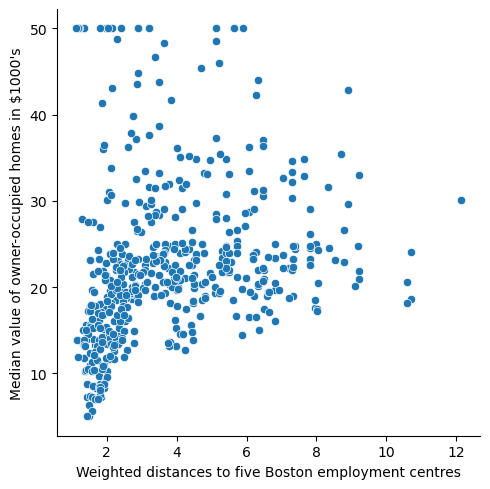

In [19]:
sns.relplot(data=df, x="dis", y="medv").set(xlabel="Weighted distances to five Boston employment centres",ylabel="Median value of owner-occupied homes in $1000's")

### Hmmm, value of the neighbourhoods does not have a strong corelation between them. I hope these people are not looking to stay near the employent center. Usually, other part of the world, the value of houses rises when they are close to employment center. Although some of the neighbourhoods near five employment centers are costly. Mostly, we can find the Boston neighbourhoods do not demand their houses near their employment center. Really peace people they are.  

![](https://media.tenor.com/hlNQxGZ0AjgAAAAC/peace-and-quiet-squid-ward.gif)

## Insight 5(Is it really peaceful??)

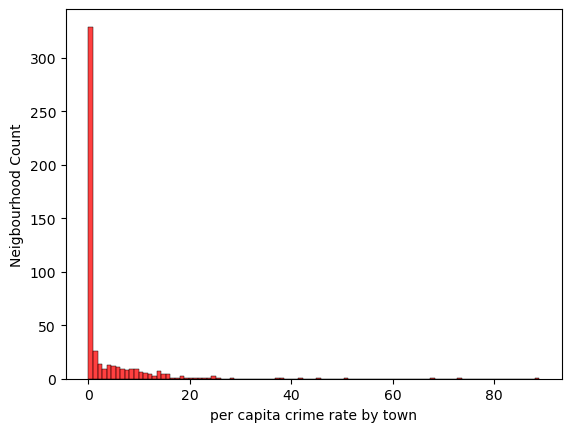

In [20]:
aplot = sns.histplot(df, x="crim",color = "red").set(xlabel="per capita crime rate by town",ylabel="Neigbourhood Count")

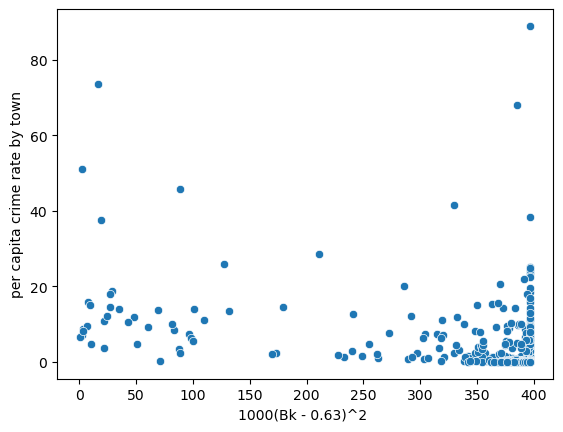

In [21]:
bplot = sns.scatterplot(data=df, x="b", y="crim").set(ylabel="per capita crime rate by town",xlabel="1000(Bk - 0.63)^2 ")

### Trully the people of Boston were really peaceful. The data prooved that number of crimes committed for each person in town is very low. As the data comes from the record of 1970, there was decrimination of white people and black people. Even at that time, neighbourhood filled with black people had few crime rate in Boston. 

### Hello!!, this has got good days even at the time the country itself was expecting peace. 

![](https://media.tenor.com/OlHZYKDJjwUAAAAC/whitepeople-white.gif)

## Insight 6

[Text(0.5, 0, 'nitric oxides concentration (parts per 10 million)')]

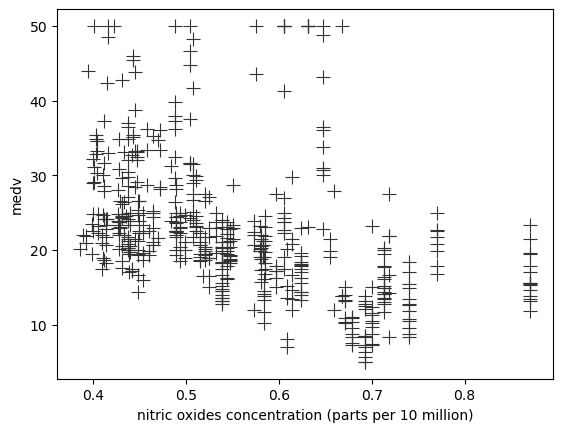

In [22]:
sns.scatterplot(data=df, x="nox", y="medv", s=100, color=".2", marker="+").set(xlabel="nitric oxides concentration (parts per 10 million)")

### Moreover, most of the neighbourhood with less nitric oxide concentration has more value for the houses. Even the atmosphere is peaceful at the Boston area and market too demand higher value for those area. People and the atmosphere is peaceful at Boston. Can it be the area with more nitric oxide concentration as slump area in Boston where poor people stays? Let us see in the upcoming insights

## Insight 7

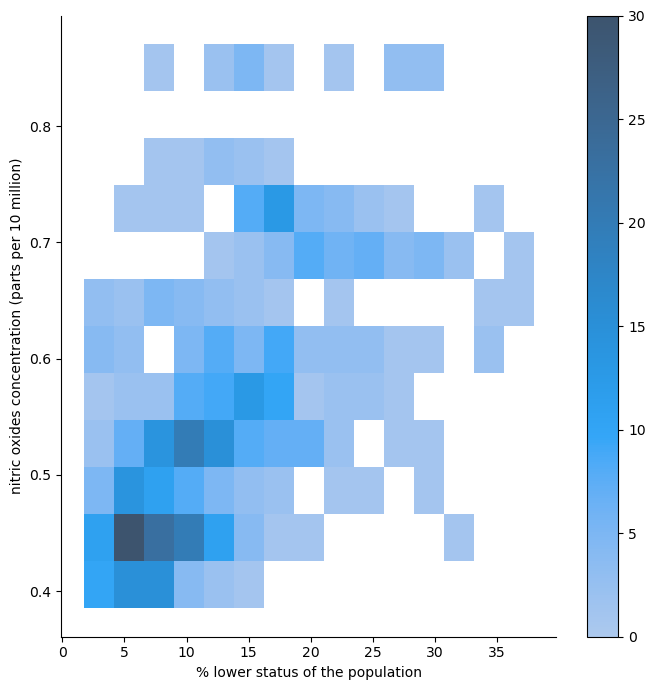

In [23]:
sns.displot(df, x="lstat", y="nox",cbar=True,height=7).set(ylabel="nitric oxides concentration (parts per 10 million)",xlabel="% lower status of the population")

### There is a positive relationship between the % lower status of the population and nitric oxides concentration (parts per 10 million).We can find out that most of the neighbourhoods are living a lavish life. The neighbourhood with people who are rich live in a area with peaceful atmosphere. Whereas, the neighbourhood with less income people live in a area where the pollutants are high. It shows some degree of slump area over the region of Boston.

## Insight 8(Are there owners of vintage homes with pooverty condition?)

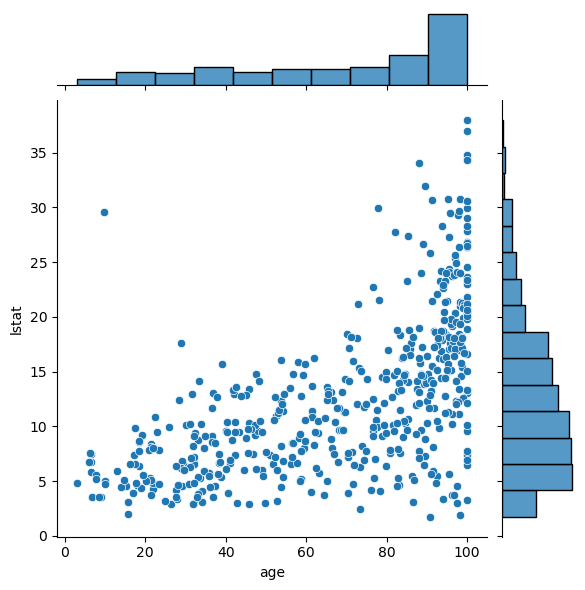

In [24]:
sns.jointplot(data=df, x="age", y="lstat")

### Boston neighbourhood consist most of the home that has more than 80% percentage homes built prior 1940's. Most of the neighbourhood in the city remains older. We can also find that people with lower status do own these old homes. They can sell these home and become richer, but the question is, are there homes really valuable, so that they can become filty rich?

## Insight 9 (Let's check the value of neighbourhoods where poor people stay)

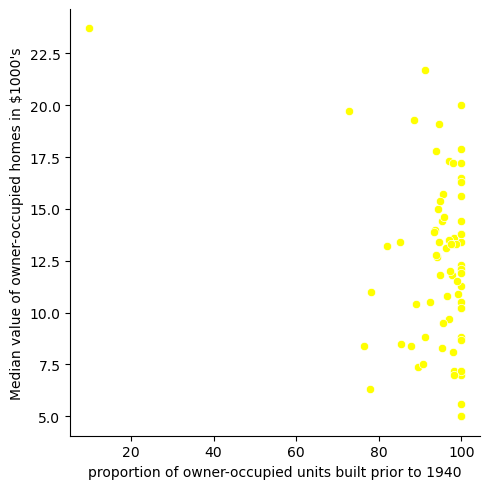

In [25]:
above_20 = df[df["lstat"] > 20] # considering poor neighbourhood as lstat greater than 20
sns.relplot(data=above_20, x="age", y="medv", color = "Yellow").set(
ylabel="Median value of owner-occupied homes in $1000's",xlabel="proportion of owner-occupied units built prior to 1940")


### Hmmm. Most of the people who are poor stays at old homes only. There are neighbourhood in which homes have value more than 15000 dollar. We can tell that few of the poor community can become richer by selling their homes. I am not sure why are they hesitant. Just sell and live good life.

![](https://c.tenor.com/In8WFshvaz8AAAAM/i-made-a-poor-choice-last-week-mistake.gif)

# Multiple Linear Regression

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [27]:
# Checking the availability of null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [28]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

### As the columns are in numerical there is no need of encoding

## Spliting Data for testing and training 

In [53]:
# Using Sklearn to import train_test_split
from sklearn.model_selection import train_test_split

In [56]:
# Seperating the values in different dataframe 
x = df.drop(["medv"],axis=1)
y = df["medv"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

In [33]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

404
102
404
102


In [34]:
x_test.shape

(102, 13)

In [35]:
type(x_train)

pandas.core.frame.DataFrame

## Fitting The model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
#Prediction of training data
y_train_pre = lr.predict(x_train)

In [58]:
#Prediction of testing data
y_test_pre = lr.predict(x_test)

## Prediction for training data

Text(0.5, 1.0, 'Training Data Prediction')

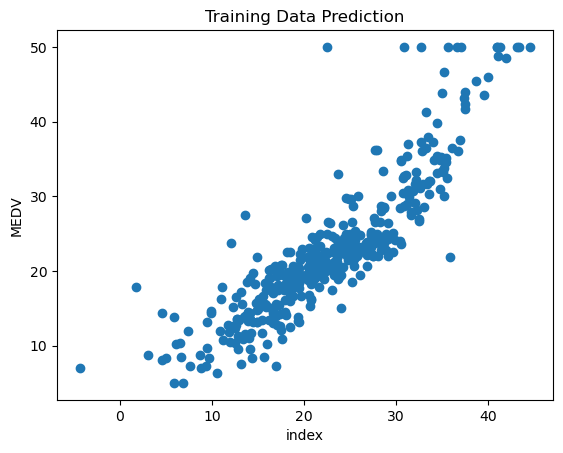

In [40]:
plt.scatter(y_train_pre,y_train)
plt.xlabel('index')
plt.ylabel('MEDV')
plt.title('Training Data Prediction')

#### There are only few outliers, otherewise the prediction is close to the training data

### Testing the accuracy for training data

In [41]:
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
mse = mean_squared_error(y_train,y_train_pre)

In [43]:
rsq = r2_score(y_train,y_train_pre)

In [44]:
print('mean squared error :',mse)
print('r square :',rsq) # R sqaure close to 1, indicating there is less variation from prediction data

mean squared error : 19.326470203585725
r square : 0.7730135569264234


# Prediction for test data

Text(0.5, 1.0, 'Test Data Prediction')

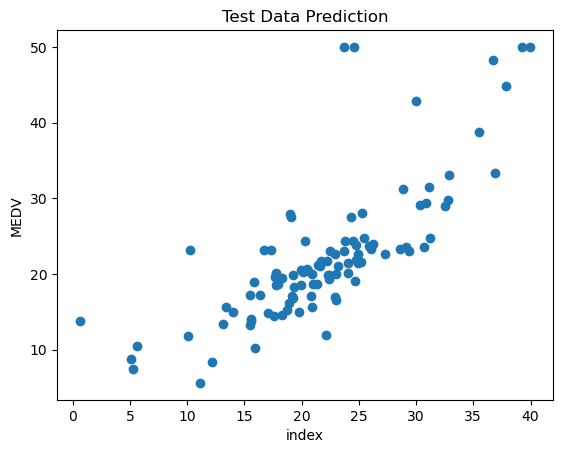

In [45]:
plt.scatter(y_test_pre,y_test)
plt.xlabel('index')
plt.ylabel('MEDV')
plt.title('Test Data Prediction')

#### There are some more ouliers compared to training data, moreover there is slight fall in the accuracy of prediction data with test data

### Testing the accuracy for test data

In [46]:
mse = mean_squared_error(y_test,y_test_pre)

In [47]:
rsq = r2_score(y_test,y_test_pre)

In [48]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 33.44897999767649
r square : 0.5892223849182514


### Plotting

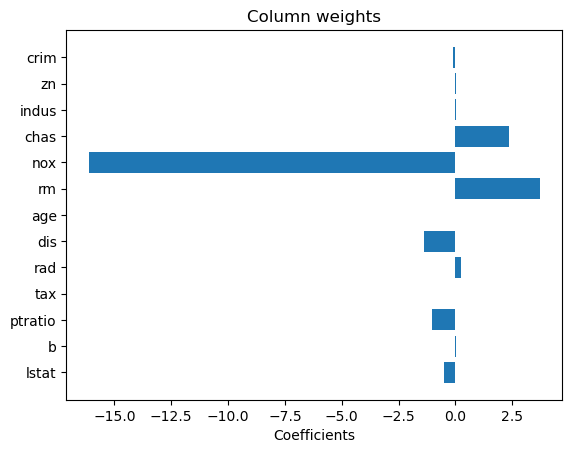

In [49]:
fig, ax = plt.subplots()
ax.barh(list(x_train.columns), list(lr.coef_), align='center')
ax.invert_yaxis()
ax.set_xlabel('Coefficients')
ax.set_title('Column weights')
plt.show()

## Model for Predicting Price

In [50]:
def price(a,b,c,d,e,f,g,h,i,j,k,l,m):
    a = lr.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m]])
    return a


In [51]:
price(0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.49949836])

![](https://i.pinimg.com/originals/f8/89/1e/f8891ef65e086abc67e5b448acb8bc12.gif)